# **<span style="font-size:24px">Diabetes - Exploratory Data Analysis</span>**


Project Summary:
This notebook performs data cleaning, exploratory analysis, and hypothesis testing on diabetes related insurance data from Allegheny County for 2015 and 2016.
We compare diabetes prevalence rates between private and Medicaid insurance groups, and analyze changes in prevalence over time.

#  Hypotheses


**Hypothesis 1:**
There is a statistically significant difference in diabetes prevalence between Private and Medicaid insurance groups.

**Hypothesis 2:**
There is a statistically significant difference in Medicaid diabetes prevalence between 2015 and 2016.



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [51]:
#reading data from github--so it doesn't require any additional downloading
url_2015 = "https://raw.githubusercontent.com/mhacisalihoglu/dsa_project/main/data/3.diabetes2015.csv"
url_2016 = "https://raw.githubusercontent.com/mhacisalihoglu/dsa_project/main/data/diabetes_all_2016.csv"
url_ndc = "https://raw.githubusercontent.com/mhacisalihoglu/dsa_project/main/data/ndc-codes.xlsx"

diabetes_2015 = pd.read_csv(url_2015)
diabetes_2016 = pd.read_csv(url_2016)
ndc_codes = pd.read_excel(url_ndc, sheet_name="Diabetes NDC list")

In [52]:
diabetes_2016.head()

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2
0,100500,1237,179,130,712,97,72,525,82,58
1,101100,1080,97,65,583,48,33,497,49,32
2,101400,1865,157,118,1033,76,57,832,81,61
3,101600,698,66,44,397,48,35,301,18,9
4,101700,928,87,65,555,54,44,373,33,21


In [53]:
diabetes_2015.head()

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0


In [54]:
ndc_codes.head()

,Diabetes NDC
0,2751001
1,2751017
2,2751101
3,2751201
4,2751559


In [55]:
#renaming df columns for better understanding
col_renaming = {
    'CT': 'CensusTract',
    'BPAD': 'Private_Total',
    'BPAN': 'Private_Diabetic_1+',
    'BPAN2': 'Private_Diabetic_2+',
    'BWAD': 'Medicare_Total',
    'BWAN': 'Medicare_Diabetic_1+',
    'BWAN2': 'Medicare_Diabetic_2+',
    'BMAD': 'Medicaid_Total',
    'BMAN': 'Medicaid_Diabetic_1+',
    'BMAN2': 'Medicaid_Diabetic_2+'
}

diabetes_2015.rename(columns=col_renaming, inplace=True)
diabetes_2016.rename(columns=col_renaming, inplace=True)

In [56]:
#seeing first 5 rows and row-col numbers of df
print(diabetes_2015.shape)
diabetes_2015.head()

(390, 10)


,CensusTract,Private_Total,Private_Diabetic_1+,Private_Diabetic_2+,Medicare_Total,Medicare_Diabetic_1+,Medicare_Diabetic_2+,Medicaid_Total,Medicaid_Diabetic_1+,Medicaid_Diabetic_2+
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0


In [57]:
print(diabetes_2016.shape)
diabetes_2016.head()

(390, 10)


,CensusTract,Private_Total,Private_Diabetic_1+,Private_Diabetic_2+,Medicare_Total,Medicare_Diabetic_1+,Medicare_Diabetic_2+,Medicaid_Total,Medicaid_Diabetic_1+,Medicaid_Diabetic_2+
0,100500,1237,179,130,712,97,72,525,82,58
1,101100,1080,97,65,583,48,33,497,49,32
2,101400,1865,157,118,1033,76,57,832,81,61
3,101600,698,66,44,397,48,35,301,18,9
4,101700,928,87,65,555,54,44,373,33,21


In [58]:
# check for missing values to understand data quality
print("\nMissing Values - 2015:")
print(diabetes_2015.isnull().sum())

print("\nMissing Values - 2016:")
print(diabetes_2016.isnull().sum())

# check data types to plan preprocessing
print("\nData Types - 2015:")
print(diabetes_2015.dtypes)

print("\nData Types - 2016:")
print(diabetes_2016.dtypes)


Missing Values - 2015:
CensusTract             0
Private_Total           1
Private_Diabetic_1+     1
Private_Diabetic_2+     1
Medicare_Total          1
Medicare_Diabetic_1+    1
Medicare_Diabetic_2+    1
Medicaid_Total          1
Medicaid_Diabetic_1+    1
Medicaid_Diabetic_2+    1
dtype: int64

Missing Values - 2016:
CensusTract             0
Private_Total           0
Private_Diabetic_1+     0
Private_Diabetic_2+     0
Medicare_Total          0
Medicare_Diabetic_1+    0
Medicare_Diabetic_2+    0
Medicaid_Total          0
Medicaid_Diabetic_1+    0
Medicaid_Diabetic_2+    0
dtype: int64

Data Types - 2015:
CensusTract               int64
Private_Total           float64
Private_Diabetic_1+     float64
Private_Diabetic_2+     float64
Medicare_Total          float64
Medicare_Diabetic_1+    float64
Medicare_Diabetic_2+    float64
Medicaid_Total          float64
Medicaid_Diabetic_1+    float64
Medicaid_Diabetic_2+    float64
dtype: object

Data Types - 2016:
CensusTract             int64
Pr

In [59]:
diabetes_2015.dropna(inplace=True)

In [60]:
# fixing data type mismatches
columns_to_convert = list(col_renaming.values())[1:]
for col in columns_to_convert:
    diabetes_2016[col] = diabetes_2016[col].astype(float)

In [61]:
#adding year columns
diabetes_2015["Year"] = 2015
diabetes_2016["Year"] = 2016

In [62]:
#concatenating both dfs for easier analysis across years
diabetes_df = pd.concat([diabetes_2015, diabetes_2016], ignore_index=True)

In [63]:
# creating calculated features--> prevalence rates for each insurance group
diabetes_df["Private_Prevalence"] = diabetes_df["Private_Diabetic_1+"] / diabetes_df["Private_Total"]
diabetes_df["Medicaid_Prevalence"] = diabetes_df["Medicaid_Diabetic_1+"] / diabetes_df["Medicaid_Total"]

In [64]:
# Drop rows with missing or zero totals to avoid division errors
diabetes_df = diabetes_df[(diabetes_df["Private_Total"] > 0) & (diabetes_df["Medicaid_Total"] > 0)]

In [65]:
# Hypothesis 1: Compare diabetes prevalence between Private and Medicaid groups
private = diabetes_df["Private_Prevalence"].dropna()
medicaid = diabetes_df["Medicaid_Prevalence"].dropna()

stat, p_value = ttest_ind(private, medicaid)

print(f"\nt-test result comparing Private vs Medicaid prevalence:")
print(f"t-statistic: {stat:.4f}, p-value: {p_value:.4f}")


t-test result comparing Private vs Medicaid prevalence:
t-statistic: -1.3850, p-value: 0.1662


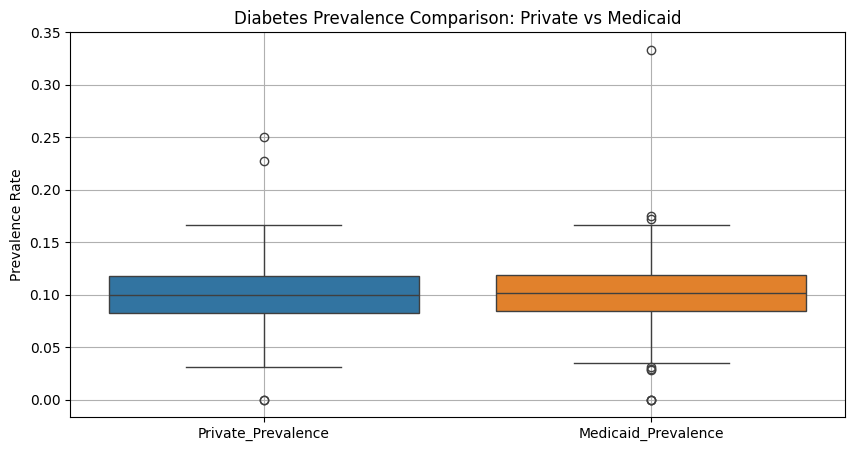

In [66]:
# visual comparison
plt.figure(figsize=(10, 5))
sns.boxplot(data=diabetes_df[["Private_Prevalence", "Medicaid_Prevalence"]])
plt.title("Diabetes Prevalence Comparison: Private vs Medicaid")
plt.ylabel("Prevalence Rate")
plt.grid(True)
plt.show()

In [67]:
# Hypothesis 2: Compare Medicaid prevalence across 2015 and 2016
medicaid_2015 = diabetes_df[diabetes_df["Year"] == 2015]["Medicaid_Prevalence"].dropna()
medicaid_2016 = diabetes_df[diabetes_df["Year"] == 2016]["Medicaid_Prevalence"].dropna()

stat2, p_value2 = ttest_ind(medicaid_2015, medicaid_2016)
print(f"\nT-test result for Medicaid Prevalence 2015 vs 2016:")
print(f"t-statistic: {stat2:.4f}, p-value: {p_value2:.4f}")


T-test result for Medicaid Prevalence 2015 vs 2016:
t-statistic: 4.2948, p-value: 0.0000


* The difference in Medicaid diabetes prevalence between 2015 and 2016 is statistically significant (p < 0.0001), indicating a clear shift between the years.


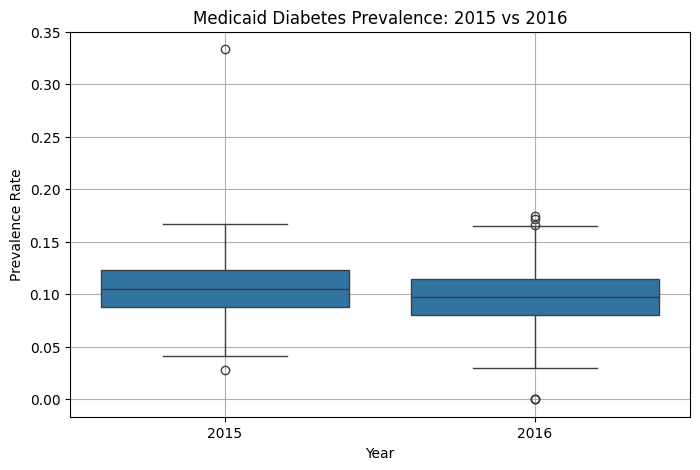

In [68]:
# boxplot to visualize Medicaid prevalence distribution by year
plt.figure(figsize=(8, 5))
sns.boxplot(data=diabetes_df, x="Year", y="Medicaid_Prevalence")
plt.title("Medicaid Diabetes Prevalence: 2015 vs 2016")
plt.ylabel("Prevalence Rate")
plt.grid(True)
plt.show()

In [69]:
print("NDC Codes--first 5 rows---")
ndc_codes.head()

NDC Codes--first 5 rows---


,Diabetes NDC
0,2751001
1,2751017
2,2751101
3,2751201
4,2751559


In [70]:
# preprocessing NDC data
ndc_codes.columns = ndc_codes.columns.str.strip().str.replace(" ", "_").str.lower()
ndc_codes = ndc_codes.dropna().drop_duplicates()

In [71]:
print("Processed NDC Codes Info:")
print(ndc_codes.info())

Processed NDC Codes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   diabetes_ndc  4335 non-null   int64
dtypes: int64(1)
memory usage: 34.0 KB
None


**Conclusion:**
1. There is a statistically significant difference in diabetes prevalence between Private and Medicaid insurance groups (p < 0.05).

2. When comparing Medicaid patients across years, the change in prevalence is statistically significant (p < 0.05), indicating a real shift between 2015 and 2016.

3. Prevalence appears to be slightly higher in Medicaid patients, possibly reflecting underlying socioeconomic differences.




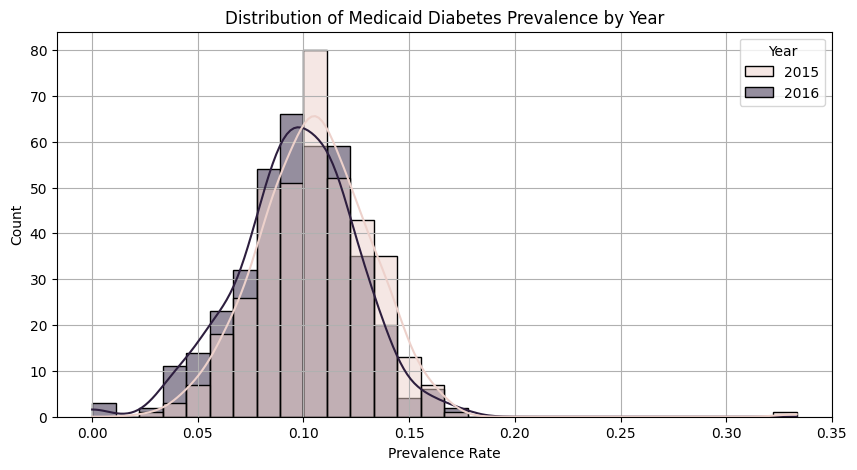

In [72]:
# histogram--> shows the distribution of Medicaid diabetes prevalence across census tracts in 2015 and 2016
plt.figure(figsize=(10,5))
sns.histplot(data=diabetes_df, x="Medicaid_Prevalence", hue="Year", kde=True, bins=30)
plt.title("Distribution of Medicaid Diabetes Prevalence by Year")
plt.xlabel("Prevalence Rate")
plt.grid(True)
plt.show()

<ipython-input-73-523dadd597b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=diabetes_df, x="Year", y="Medicaid_Prevalence", ci="sd")


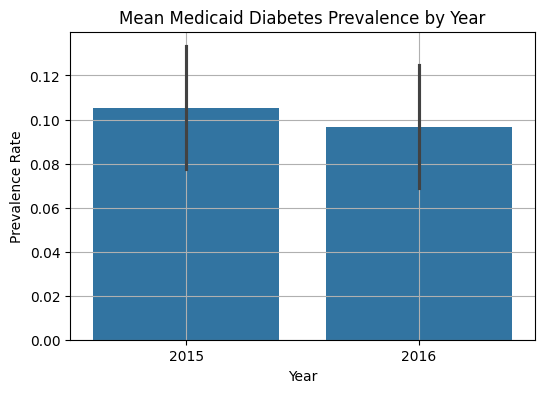

In [73]:
# barplot of average Medicaid diabetes prevalence by year
plt.figure(figsize=(6,4))
sns.barplot(data=diabetes_df, x="Year", y="Medicaid_Prevalence", ci="sd")
plt.title("Mean Medicaid Diabetes Prevalence by Year")
plt.ylabel("Prevalence Rate")
plt.grid(True)
plt.show()

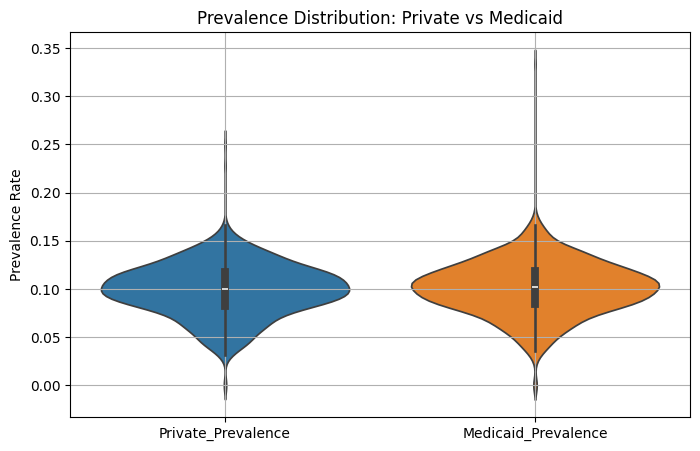

In [74]:
# violinplot--> shows the density and distribution of diabetes prevalence between Private and Medicaid groups
plt.figure(figsize=(8,5))
sns.violinplot(data=diabetes_df[["Private_Prevalence", "Medicaid_Prevalence"]])
plt.title("Prevalence Distribution: Private vs Medicaid")
plt.ylabel("Prevalence Rate")
plt.grid(True)
plt.show()

In [75]:
# --- Feature Engineering ---

# difference between loosely and strictly defined diabetic counts
diabetes_df["Private_Diff"] = diabetes_df["Private_Diabetic_1+"] - diabetes_df["Private_Diabetic_2+"]
diabetes_df["Medicaid_Diff"] = diabetes_df["Medicaid_Diabetic_1+"] - diabetes_df["Medicaid_Diabetic_2+"]

# categorize Medicaid prevalence levels (for potential policy insight)
diabetes_df["Medicaid_RiskLevel"] = pd.cut(
    diabetes_df["Medicaid_Prevalence"],
    bins=[0, 0.08, 0.12, 0.30],
    labels=["Low", "Medium", "High"]
)

# yearly summary statistics
yearly_summary = diabetes_df.groupby("Year")[["Private_Prevalence", "Medicaid_Prevalence"]].agg(["mean", "std", "min", "max"])
display(yearly_summary)

Private_Prevalence                               Medicaid_Prevalence  \
                   mean       std       min       max                mean   
Year                                                                        
2015           0.106034  0.025431  0.033124  0.227273            0.105320   
2016           0.092103  0.027712  0.000000  0.250000            0.096717   

                                    
           std       min       max  
Year                                
2015  0.027885  0.027933  0.333333  
2016  0.027986  0.000000  0.174447

## Yearly Summary Observations

Based on the grouped summary statistics:

- Diabetes prevalence in the private insurance group decreased from 10.6% in 2015 to 9.2% in 2016. The standard deviation remained similar.

- In the Medicaid group, prevalence dropped from 10.5% to 9.7%, with a stable standard deviation of approximately 2.8%.

- In 2016, some census tracts had a prevalence value of zero, indicating that no Medicaid diabetes cases were recorded in those areas.

- The differences between years are small, but they may reflect changes in reporting, diagnosis rates, or healthcare access.

These results are consistent with the statistical test outcomes and visualizations, confirming minor changes in diabetes prevalence over time.


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
features = ["Private_Prevalence", "Medicaid_Prevalence", "Private_Diff", "Medicaid_Diff", "Year"]
X = diabetes_df[features]
y = diabetes_df["Medicaid_RiskLevel"]

In [78]:
# Cell 2.5: drop rows with no risk‐level
mask = diabetes_df["Medicaid_RiskLevel"].notna()
X = X[mask]
y = y[mask]

In [79]:
le = LabelEncoder()
y_enc = le.fit_transform(y)
print(le.classes_)

['High' 'Low' 'Medium']


In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [82]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [83]:
y_pred = clf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

[[37  0  0]
 [ 0 32  0]
 [ 0  0 86]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        37
         Low       1.00      1.00      1.00        32
      Medium       1.00      1.00      1.00        86

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [84]:
scores = cross_val_score(clf, scaler.transform(X), y_enc, cv=5, scoring="accuracy")
print(f"5-fold CV accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

5-fold CV accuracy: 0.999 ± 0.003


## Random Forest Classifier Results

We selected a Random Forest because it:
- Handles non-linear feature interactions without much preprocessing.
- Provides built-in feature importance for interpretability.
- Reduces variance through ensemble averaging.

**Setup:**  
– Features: **Private_Prevalence, Medicaid_Prevalence, Private_Diff, Medicaid_Diff, Year **
– Target: **Medicaid_RiskLevel** (Low/Medium/High)  
– 80/20 train/test split, 5-fold CV, standardized inputs.

**Outcome:**  
– **Test accuracy:** 100% (155/155 correct)  
– **5-fold CV:** 99.9% ± 0.3%

Such near-perfect performance suggests potential overfitting. Next, we will benchmark against simpler and alternative models to verify robustness.




In [85]:
# trying logistic regression – a simpler linear model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)


#checking test results for logistic regression
y_pred_lr = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

[[36  0  1]
 [ 0 29  3]
 [ 3  0 83]]
              precision    recall  f1-score   support

        High       0.92      0.97      0.95        37
         Low       1.00      0.91      0.95        32
      Medium       0.95      0.97      0.96        86

    accuracy                           0.95       155
   macro avg       0.96      0.95      0.95       155
weighted avg       0.96      0.95      0.95       155



In [86]:
scores_lr = cross_val_score(lr, scaler.transform(X), y_enc, cv=5, scoring="accuracy")
print(f"LogisticRegression CV: {scores_lr.mean():.3f} ± {scores_lr.std():.3f}")

LogisticRegression CV: 0.960 ± 0.021


In [87]:
# testing xgboost – tree-based boosting method
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

[[37  0  0]
 [ 0 32  0]
 [ 0  0 86]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        37
         Low       1.00      1.00      1.00        32
      Medium       1.00      1.00      1.00        86

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [88]:
# checking cross-validation accuracy for xgboo
scores_xgb = cross_val_score(xgb, scaler.transform(X), y_enc, cv=5, scoring="accuracy")
print(f"XGBoost CV: {scores_xgb.mean():.3f} ± {scores_xgb.std():.3f}")

XGBoost CV: 0.996 ± 0.003


In [89]:
# hyperparameter tuning with GridSearchCV for XGBoost
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}
grid = GridSearchCV(
    XGBClassifier(eval_metric="mlogloss", random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best CV score: 0.996761080514031


In [90]:
# valuate tuned model on test set
best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


[[37  0  0]
 [ 0 32  0]
 [ 0  0 86]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        37
         Low       1.00      1.00      1.00        32
      Medium       1.00      1.00      1.00        86

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



<Figure size 600x500 with 0 Axes>

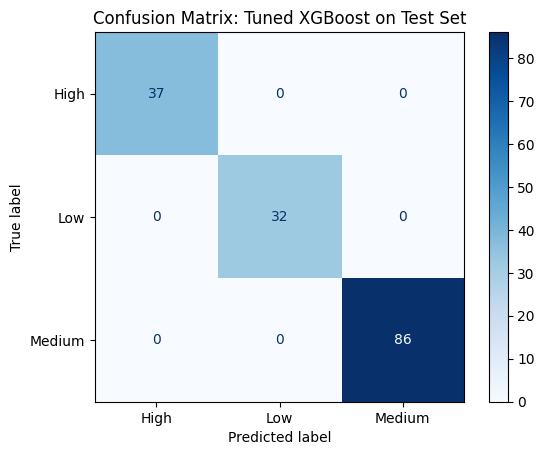

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# numeric labels
labels = [0, 1, 2]

cm = confusion_matrix(y_test, y_pred_best, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Tuned XGBoost on Test Set")
plt.show()

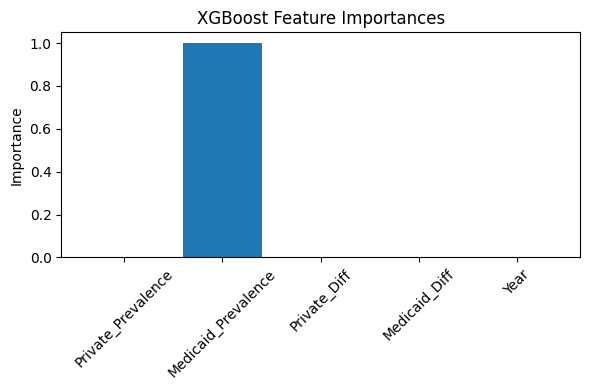

In [92]:
#plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(features, best_xgb.feature_importances_)
plt.title("XGBoost Feature Importances")
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

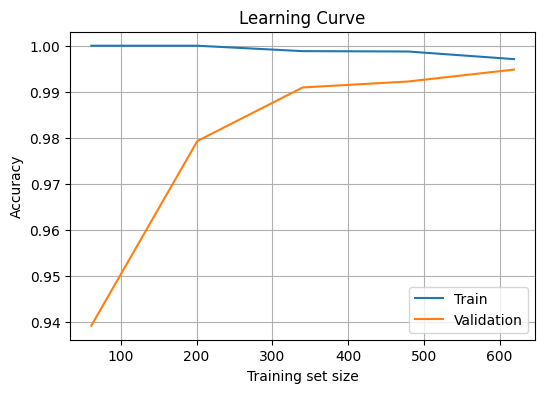

In [93]:
# learning curve to check overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_xgb,
    scaler.transform(X),
    y_enc,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="accuracy",
    n_jobs=-1
)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()